In [1]:
import argparse
import json
import os
import time
import itertools
import pickle
import copy
import random
import math

import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Dataset, TensorDataset
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix
import dfca as DFCA
import ifca as IFCA

import numpy as np

from util import *

Reads Config file and prepares the arguments you can choose in the config_dfca.json/config_ifca.json

In [2]:
LR_DECAY = False
def get_dfca_config():

    # read config json and update the sysarg
    with open("config_dfca.json", "r") as read_file:
        config = json.load(read_file)

    if config["config_override"] == "":
        del config['config_override']
    else:
        print(config['config_override'])
        config_override = json.loads(config['config_override'])
        del config['config_override']
        config.update(config_override)

    return config

def get_ifca_config():

    # read config json and update the sysarg
    with open("config_ifca.json", "r") as read_file:
        config = json.load(read_file)

    if config["config_override"] == "":
        del config['config_override']
    else:
        print(config['config_override'])
        config_override = json.loads(config['config_override'])
        del config['config_override']
        config.update(config_override)

    return config

Running the dfca experiment

In [3]:
start_time = time.time()
config = get_dfca_config()

config['train_seed'] = config['data_seed']

print("config:",config)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

exp = DFCA.TrainMNISTCluster(config, device)
exp.setup()
dfca = exp.run()
duration = (time.time() - start_time)
print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))


config: {'m': 1200, 'm_test': 200, 'p': 4, 'n': 200, 'uneven': True, 'h1': 200, 'num_epochs': 300, 'batch_size': 100, 'tau': 10, 'lr': 0.1, 'data_seed': 10, 'train_seed': 10, 'project_dir': 'output_dfca'}
Using device: cuda
Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:01<00:00, 7.87MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 247kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:02<00:00, 693kB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.38MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch -1 tr: l 2.295 a 0.117 clct[324, 294, 290, 292] cl_acc 0.279  1.395sec
Epoch -1 tst: l 2.294 a 0.136 clct[54, 46, 47, 53] cl_acc 0.335  0.986sec
Epoch 0 tr: l 2.248 a 0.285 clct[296, 320, 265, 319] cl_acc 0.298  lr 0.100000 17.686sec(train) 1.296sec(infer)
Epoch 0 tst: l 2.244 a 0.306 clct[47, 61, 44, 48] cl_acc 0.300  0.970sec
result written at output_dfca/results.pickle
checkpoint written at output_dfca/checkpoint.pt
Epoch 1 tr: l 2.248 a 0.263 clct[295, 287, 316, 302] cl_acc 0.301  lr 0.100000 16.713sec(train) 1.282sec(infer)
Epoch 1 tst: l 2.239 a 0.306 clct[54, 35, 47, 64] cl_acc 0.335  0.961sec
Epoch 2 tr: l 2.255 a 0.222 clct[302, 311, 269, 318] cl_acc 0.287  lr 0.100000 16.863sec(train) 1.285sec(infer)
Epoch 2 tst: l 2.245 a 0.265 clct[55, 43, 44, 58] cl_acc 0.300  0.964sec
Epoch 3 tr: l 2.244 a 0.187 clct[240, 342, 273, 345] cl_acc 0.307  lr 0.100000 17.651sec(train) 1.279sec(infer)
Epoch 3 tst: l

Running the ifca experiment

In [4]:
start_time = time.time()
config = get_ifca_config()

config['train_seed'] = config['data_seed']

print("config:",config)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

exp = IFCA.TrainMNISTCluster(config, device)
exp.setup()
ifca = exp.run()
duration = (time.time() - start_time)
print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))


config: {'m': 1200, 'm_test': 200, 'p': 4, 'n': 200, 'uneven': True, 'h1': 200, 'num_epochs': 300, 'batch_size': 100, 'tau': 10, 'lr': 0.1, 'data_seed': 10, 'train_seed': 10, 'project_dir': 'output_ifca'}
Using device: cuda
Epoch -1 tr: l 2.294 a 0.113 clct[346, 317, 154, 383] cl_acc 0.562  1.251sec
Epoch -1 tst: l 2.292 a 0.114 clct[53, 69, 22, 56] cl_acc 0.575  0.213sec
Epoch 0 tr: l 2.170 a 0.391 clct[304, 413, 175, 308] cl_acc 0.873  lr 0.100000 7.048sec(train) 1.272sec(infer)
Epoch 0 tst: l 2.168 a 0.394 clct[49, 73, 25, 53] cl_acc 0.850  0.212sec
result written at output_ifca/results.pickle
checkpoint written at output_ifca/checkpoint.pt
Epoch 1 tr: l 1.909 a 0.643 clct[302, 297, 301, 300] cl_acc 0.997  lr 0.100000 6.852sec(train) 1.278sec(infer)
Epoch 1 tst: l 1.905 a 0.650 clct[50, 51, 49, 50] cl_acc 0.995  0.213sec
Epoch 2 tr: l 1.566 a 0.737 clct[300, 300, 300, 300] cl_acc 1.000  lr 0.100000 7.192sec(train) 1.259sec(infer)
Epoch 2 tst: l 1.559 a 0.747 clct[50, 50, 50, 50] cl_

Experiment Final Results: 

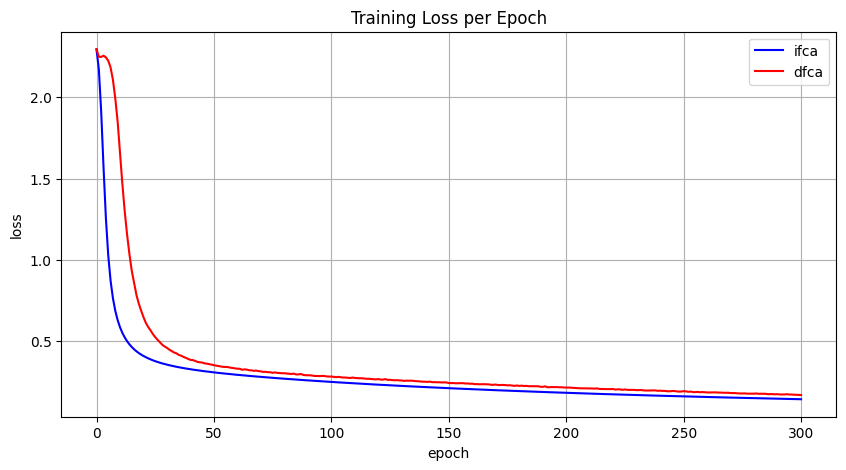

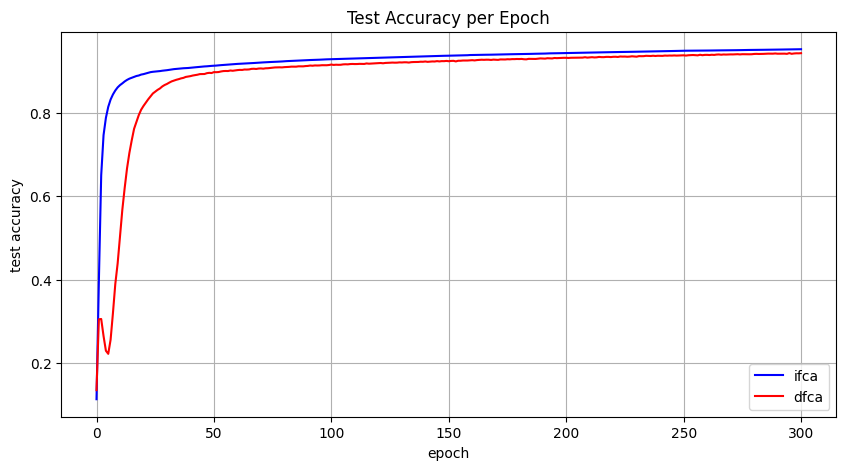

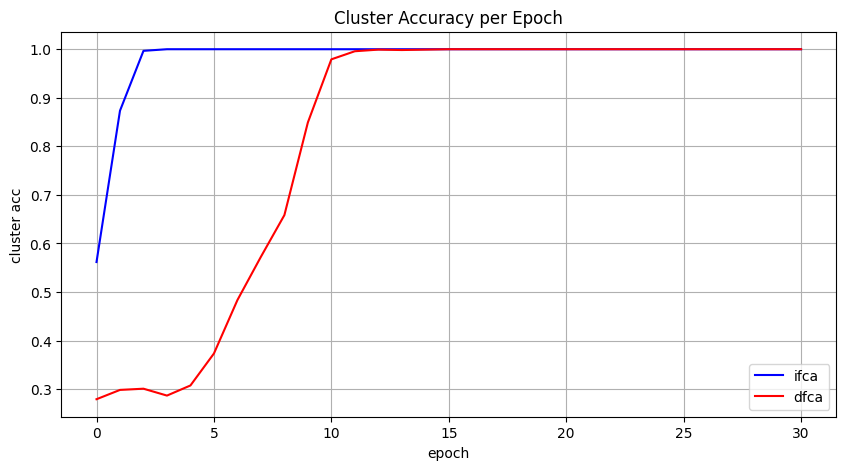

In [5]:
os.makedirs('graphs', exist_ok=True)

plt.figure(figsize=(10,5))
plt.plot([r['train']['loss'] for r in ifca], label='ifca', color='blue')
plt.plot([r['train']['loss'] for r in dfca], label='dfca', color='red')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training Loss per Epoch')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join('graphs', 'train_loss.png'))

plt.figure(figsize=(10,5))
plt.plot([r['test']['acc'] for r in ifca], label='ifca', color='blue')
plt.plot([r['test']['acc'] for r in dfca], label='dfca', color='red')
plt.xlabel('epoch')
plt.ylabel('test accuracy')
plt.title('Test Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join('graphs', 'test_acc.png'))

plt.figure(figsize=(10,5))
plt.plot([r['train']['cl_acc'] for r in ifca[:31]], label='ifca', color='blue')
plt.plot([r['train']['cl_acc'] for r in dfca[:31]], label='dfca', color='red')
plt.xlabel('epoch')
plt.ylabel('cluster acc')
plt.title('Cluster Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join('graphs', 'cluster_acc.png'))